<a href="https://colab.research.google.com/github/wizard339/education/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скринкаст интерполяция

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

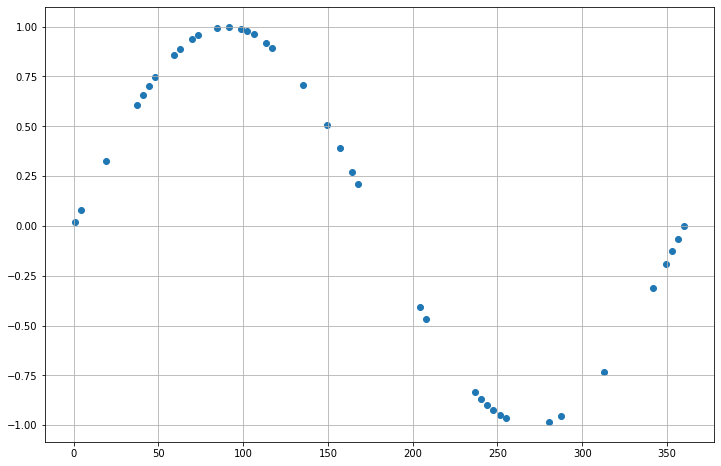

In [14]:
N = 100

df = pd.DataFrame()
## создаём N точек для оси времени
df['t'] = np.linspace(1, 360, N)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)


np.random.seed(42)
## готовим точки, которые будут пропущены в выборке
missing = np.random.randint(low=1, high=100, size=100)
## убираем часть данных из выборки
df.loc[missing, 'y'] = np.nan

## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()

In [15]:
df.head()

,t,y
0,1.000000,0.017452
1,4.626263,0.080656
2,8.252525,NaN
3,11.878788,NaN
4,15.505051,NaN


In [16]:
df.shape

(100, 2)

In [17]:
df.isna().sum()

t     0
y    61
dtype: int64

# Интерполяция

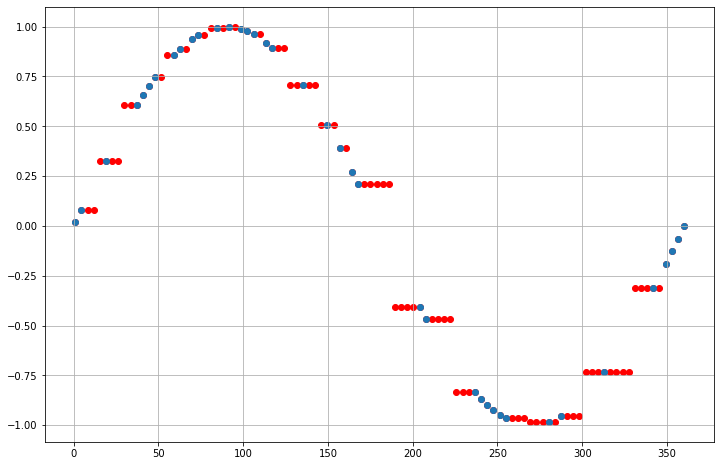

In [18]:
df['y_nearest'] = df.y.interpolate(method='nearest')
df['y_linear'] = df.y.interpolate(method='linear')
df['y_spline'] = df.y.interpolate(method='spline', order=5)

## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y_nearest, c='r')
# ax.scatter(df.t, df.y_linear, c='g', s=3)
# ax.scatter(df.t, df.y_spline, c='g', s=3)
ax.scatter(df.t, df.y)
ax.grid()

# Приведение к фиксированной сетке

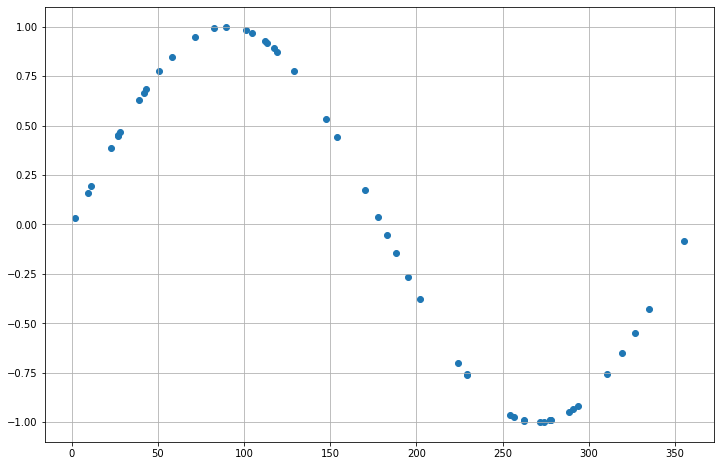

In [7]:
N = 360
df = pd.DataFrame()
## создаём 50 случайных точек для оси времени
df['t'] = N*np.random.rand(50)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)
df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()
plt.show()

In [8]:
df.head()

,t,y
8,1.987962,0.034690
34,9.150886,0.159035
36,11.314507,0.196194
19,22.881006,0.388819
13,26.656075,0.448634


In [9]:
df.isna().sum()

t    0
y    0
dtype: int64

In [10]:
## создаём регулярную сетку
ti = np.linspace(1, N, N)
# print(ti)

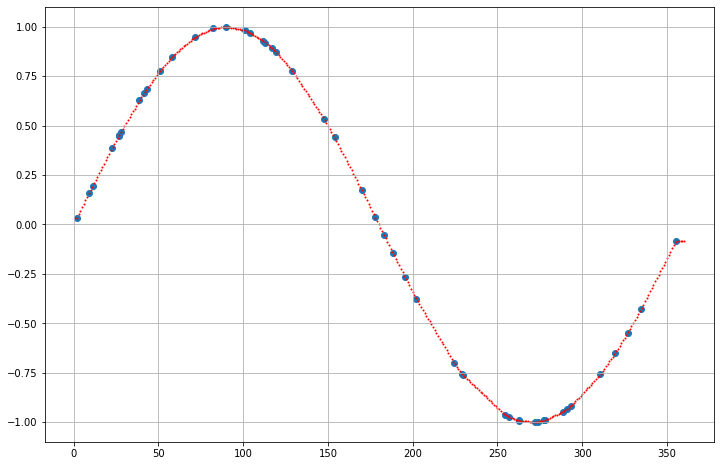

In [11]:
## создаём новый дейтафрейм для интерполированных значений
df_interp = pd.DataFrame()
df_interp['t'] = ti
## интерполируем значения исходного дейтафрейма на регулярной сетке
df_interp['y'] = np.interp(ti, df.t, df.y)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.scatter(df_interp.t, df_interp.y, marker='.', c='r', s=4)
ax.grid()
plt.show()

In [12]:
df_interp.head(50)

,t,y
0,1.0,0.034690
1,2.0,0.034898
2,3.0,0.052258
3,4.0,0.069618
4,5.0,0.086977
5,6.0,0.104337
6,7.0,0.121696
7,8.0,0.139056
8,9.0,0.156416
9,10.0,0.173618
